In [1]:
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from dask.distributed import Client
import pprint 
# functions.ipynb contains functions to calculate ozone in dobzon units from mol/mol and the weight calculator
%run /home/jovyan/escience-2022/Tjaernoe2022-group2/notebooks/func.ipynb
%run /home/jovyan/escience-2022/Tjaernoe2022-group2/Emma/CMIP6_func.ipynb
%matplotlib inline

In [2]:
client = Client(n_workers=5)
client

/srv/conda/envs/notebook/lib/python3.9/site-packages/distributed/node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33667 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:33667/status,
Dashboard: http://127.0.0.1:33667/status,Workers: 5
Total threads: 20,Total memory: 62.81 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40047,Workers: 5
Dashboard: http://127.0.0.1:33667/status,Total threads: 20
Started: Just now,Total memory: 62.81 GiB
Comm: tcp://127.0.0.1:33619,Total threads: 4
Dashboard: http://127.0.0.1:36771/status,Memory: 12.56 GiB
Nanny: tcp://127.0.0.1:45231,


In [3]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
waccm_aero = col.search(source_id=['CESM2-WACCM'], experiment_id=['historical'], table_id=['Amon'], variable_id=['ta'])
cam_aero = col.search(source_id=['CESM2'], experiment_id=['historical'], table_id=['Amon'], variable_id=['ta'], member_id=['r1i1p1f1','r2i1p1f1','r3i1p1f1'])

waccm_aero.df
cam_aero.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,ta,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
1,CMIP,NCAR,CESM2,historical,r2i1p1f1,Amon,ta,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r2...,NaN,20190308
2,CMIP,NCAR,CESM2,historical,r3i1p1f1,Amon,ta,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r3...,NaN,20190308


In [4]:
ds_dict_waccm_temp = waccm_aero.to_dataset_dict(zarr_kwargs={'use_cftime':True})
ds_dict_cam_temp = cam_aero.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [7]:
print(list(ds_dict_waccm_temp.keys()))
print(list(ds_dict_cam_temp.keys()))
waccm = ds_dict_waccm_temp['CMIP.NCAR.CESM2-WACCM.historical.Amon.gn']
cam = ds_dict_cam_temp['CMIP.NCAR.CESM2.historical.Amon.gn']

['CMIP.NCAR.CESM2-WACCM.historical.Amon.gn']
['CMIP.NCAR.CESM2.historical.Amon.gn']


In [8]:
# Select the starting year 5 years prior to the eruption
start_pina = cftime.DatetimeNoLeap(1986,1,15)
end_pina = cftime.DatetimeNoLeap(1996,1,15)

# WACCM
waccm_1986_1996 = waccm.sel(time=slice(start_pina, end_pina))
# CAM
cam_1986_1996 = cam.sel(time=slice(start_pina, end_pina))

In [9]:
# Yearly
year_waccm_anom_1986_1996_temp = calc_yearly_anomaly(waccm_1986_1996.ta,1991)
year_cam_anom_1986_1996_temp = calc_yearly_anomaly(cam_1986_1996.ta,1991)

# Monthly
mon_waccm_anom_1986_1996_temp = calc_monthly_anomaly(waccm_1986_1996.ta,1991)
mon_cam_anom_1986_1996_temp = calc_monthly_anomaly(cam_1986_1996.ta,1991)

/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 10 times more chunks
  return self.array[key]
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing with an out-of-order index is generating 10 times more chunks
  return self.array[key]


In [10]:
# Yearly
# WACCM
year_waccm_NH_anom_pina_temp = computeWeightedMean(year_waccm_anom_1986_1996_temp.where(year_waccm_anom_1986_1996_temp['lat']>60.)).compute()
year_waccm_SH_anom_pina_temp = computeWeightedMean(year_waccm_anom_1986_1996_temp.where(year_waccm_anom_1986_1996_temp['lat']<-60.)).compute()

# CAM
year_cam_NH_anom_pina_temp = computeWeightedMean(year_cam_anom_1986_1996_temp.where(year_cam_anom_1986_1996_temp['lat']>60.)).compute()
year_cam_SH_anom_pina_temp = computeWeightedMean(year_cam_anom_1986_1996_temp.where(year_cam_anom_1986_1996_temp['lat']<-60.)).compute()

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)
/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)
/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)
/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)
/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis,

In [50]:
# Monthly
# WACCM
mon_waccm_NH_anom_pina_temp = computeWeightedMean(mon_waccm_anom_1986_1996_temp.where(mon_waccm_anom_1986_1996_temp['lat']>60.)).compute()
mon_waccm_SH_anom_pina_temp = computeWeightedMean(mon_waccm_anom_1986_1996_temp.where(mon_waccm_anom_1986_1996_temp['lat']<-60.)).compute()

# CAM
mon_cam_NH_anom_pina_temp = computeWeightedMean(mon_cam_anom_1986_1996_temp.where(mon_cam_anom_1986_1996_temp['lat']>60.)).compute()
mon_cam_SH_anom_pina_temp = computeWeightedMean(mon_cam_anom_1986_1996_temp.where(mon_cam_anom_1986_1996_temp['lat']<-60.)).compute()

Task exception was never retrieved
future: <Task finished name='Task-8022' coro=<Client._gather.<locals>.wait() done, defined at /srv/conda/envs/notebook/lib/python3.9/site-packages/distributed/client.py:2038> exception=AllExit()>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/distributed/client.py", line 2047, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-8092' coro=<Client._gather.<locals>.wait() done, defined at /srv/conda/envs/notebook/lib/python3.9/site-packages/distributed/client.py:2038> exception=AllExit()>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/distributed/client.py", line 2047, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-7735' coro=<Client._gather.<locals>.wait() done, defined at /srv/conda/envs/notebook/lib/python3.

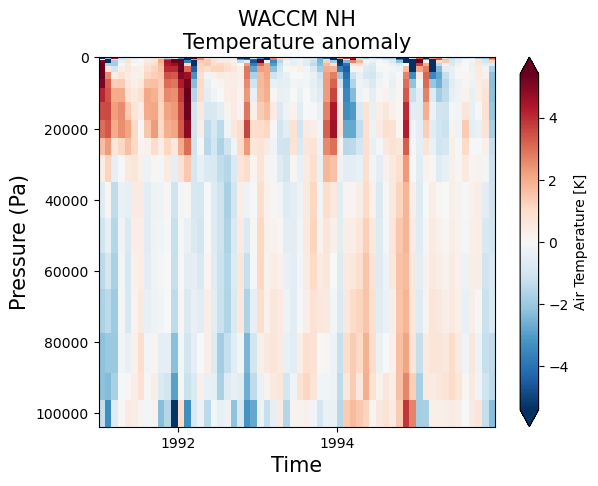

In [81]:
mon_waccm_NH_anom_pina_temp[0].sel(time=slice(pina, end_pina)).plot(y='plev', yincrease=False, robust=True)
plt.title("WACCM NH\nTemperature anomaly" , fontsize=15)
plt.ylabel('Pressure (Pa)', fontsize=15)
plt.xlabel('Time', fontsize=15)
#plt.savefig(path + 'Temp_montly_pina_waccm_NH.png')

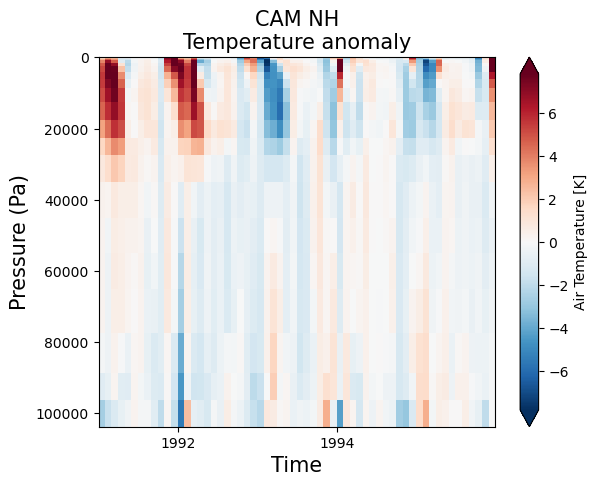

In [80]:
pina = cftime.DatetimeNoLeap(1991,1,15)
#

mon_cam_NH_anom_pina_temp[0].sel(time=slice(pina, end_pina)).plot(y='plev', yincrease=False, robust=True)
plt.title("CAM NH\nTemperature anomaly" , fontsize=15)
plt.ylabel('Pressure (Pa)', fontsize=15)
plt.xlabel('Time', fontsize=15)
#plt.savefig(path + 'Temp_montly_pina_cam_NH.png')

In [42]:
def plot_temp_cont(waccm1,waccm2, cam1, cam2, eruption_name):
    fig, (axs1, axs2) = plt.subplots(1, 2, constrained_layout=True, sharey=True, figsize=(20,10))
    #color = ['red','black','blue']
    color = ['green','darkviolet','darkorange']
    
    i = 0
    waccm1[i].plot(label="WACCM-", ax=axs1, color=color[i],y='plev', yincrease=False)
    waccm2[i].plot(label='WACCM-', ax=axs2, color=color[i],y='plev', yincrease=False)
    
    
    cam1[i].plot(label="CAM-", ax=axs1, color=color[i+1],y='plev', yincrease=False)
    cam2[i].plot(label="CAM-", ax=axs2, color=color[i+1],y='plev', yincrease=False)
    
    fig.suptitle(eruption_name, fontsize=30)
    
    #axs1.set_xticks(waccm1.year)
    #axs2.set_xticks(cam1.year)
    
    #axs1.axvline(waccm1.year[5], color='k',linestyle='--',dashes=(5, 10))
    #axs2.axvline(cam1.year[5], color='k',linestyle='--',dashes=(5, 10))
    
    axs1.set_xlabel(waccm1[0].long_name + '\n(' + cam1[0].units +')', fontsize=20)
    axs2.set_xlabel(waccm1[0].long_name + '\n(' + cam1[0].units +')', fontsize=20)
    
    axs1.set_ylabel('Pressure (Pa)', fontsize=20)
    axs2.set_ylabel('', fontsize=20)
    
    axs1.tick_params(axis="x", labelsize=20)
    axs2.tick_params(axis="x", labelsize=20)
    
    axs1.tick_params(axis="y", labelsize=20)
    axs2.tick_params(axis="y", labelsize=20)
    
    axs1.set_title(" Northern Hemisphere \n" , fontsize=25)
    axs2.set_title(" Southern Hemisphere \n" , fontsize=25)
    
    plt.legend(fontsize=25)
    return 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


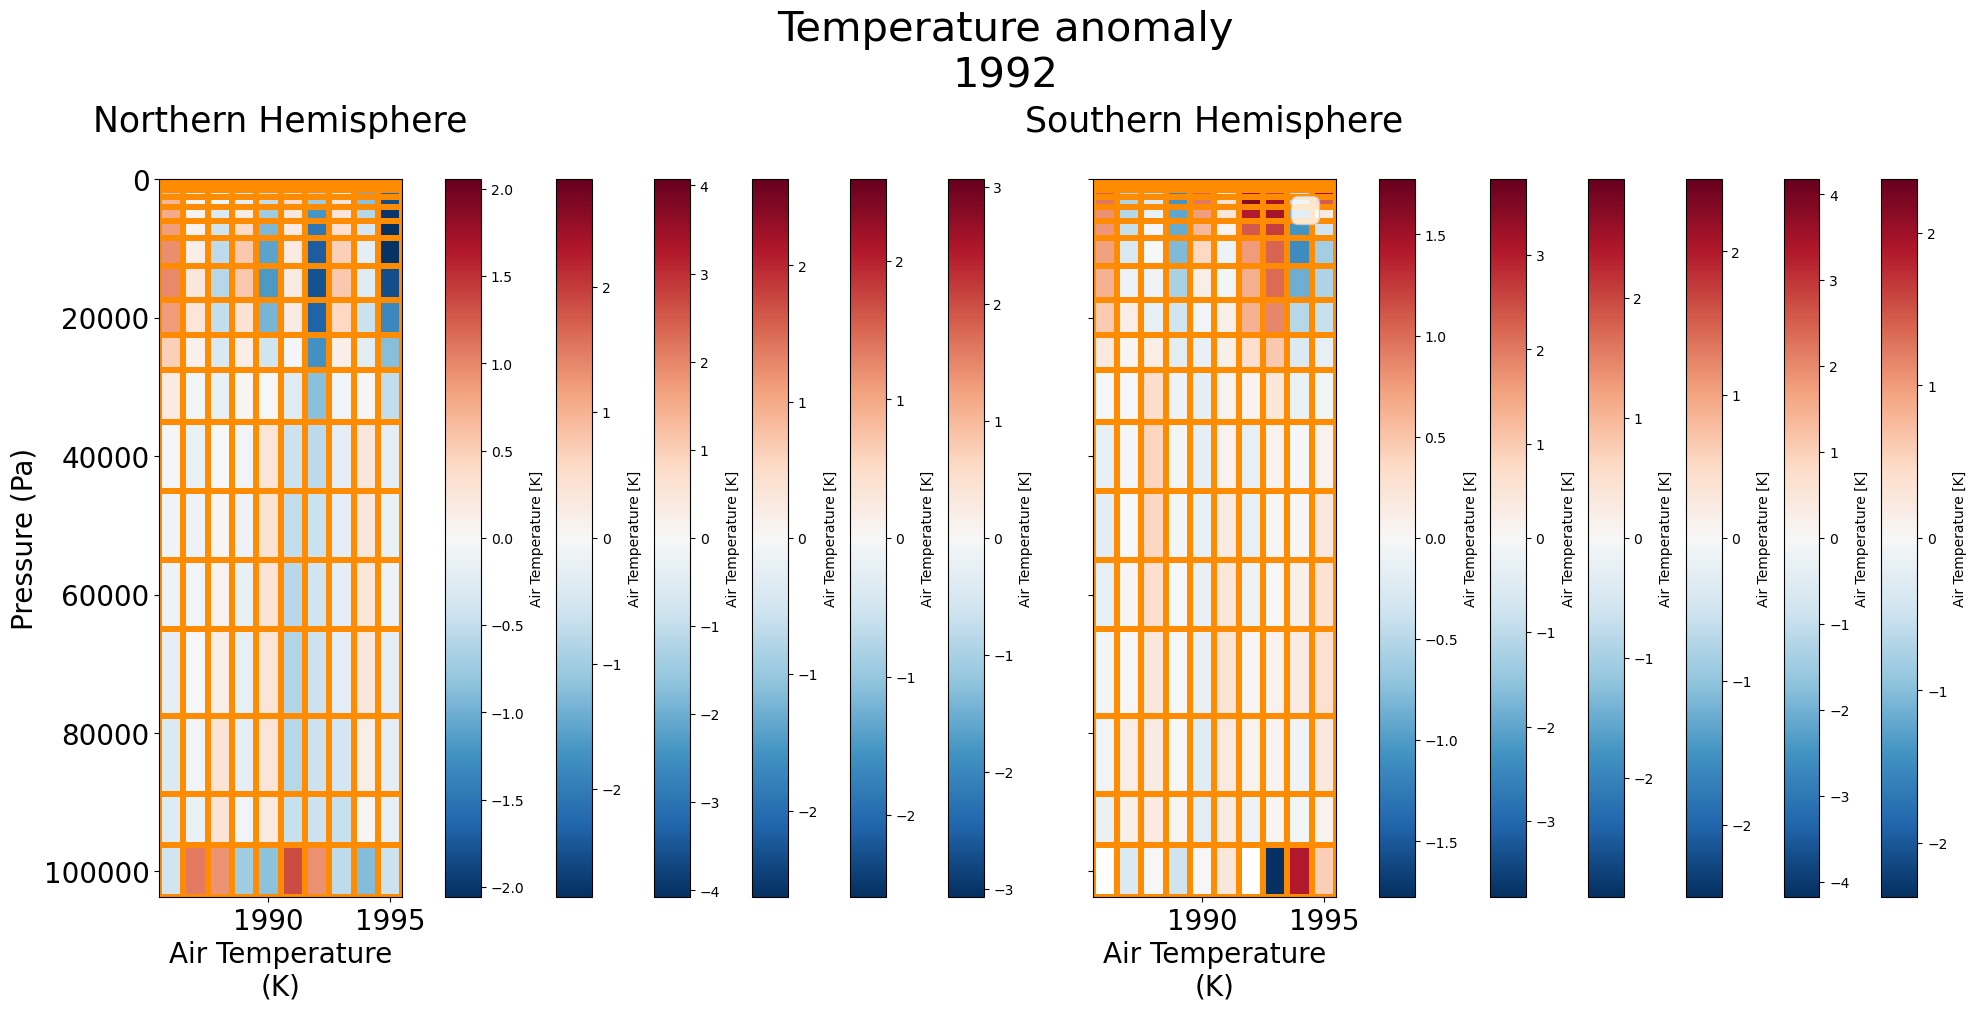

In [43]:
plot_temp(year_waccm_NH_anom_pina_temp,year_waccm_SH_anom_pina_temp,year_cam_NH_anom_pina_temp,year_cam_SH_anom_pina_temp,'Temperature anomaly\n1992')


In [37]:
def plot_temp(waccm1,waccm2, cam1, cam2, eruption_name):
    fig, (axs1, axs2) = plt.subplots(1, 2, constrained_layout=True, sharey=True, figsize=(20,10))
    #color = ['red','black','blue']
    color = ['green','darkviolet','darkorange']
    
    for i in range(3):
        j = i+1
        waccm1[i].plot(label="WACCM-"+ str(j), ax=axs1, linewidth=3, color=color[i],y='plev', yincrease=False)
        waccm2[i].plot(label='WACCM-'+ str(j), ax=axs2, linewidth=3, color=color[i],y='plev', yincrease=False)
    
    for i in range(3):
        j = i+1
        cam1[i].plot(label="CAM-"+ str(j), ax=axs1, linestyle='--', linewidth=3, color=color[i],y='plev', yincrease=False)
        cam2[i].plot(label="CAM-"+ str(j), ax=axs2, linestyle='--', linewidth=3, color=color[i],y='plev', yincrease=False)
    
    fig.suptitle(eruption_name, fontsize=30)
    
    #axs1.set_xticks(waccm1.year)
    #axs2.set_xticks(cam1.year)
    
    #axs1.axvline(waccm1.year[5], color='k',linestyle='--',dashes=(5, 10))
    #axs2.axvline(cam1.year[5], color='k',linestyle='--',dashes=(5, 10))
    
    axs1.set_xlabel(waccm1[0].long_name + '\n(' + cam1[0].units +')', fontsize=20)
    axs2.set_xlabel(waccm1[0].long_name + '\n(' + cam1[0].units +')', fontsize=20)
    
    axs1.set_ylabel('Pressure (Pa)', fontsize=20)
    axs2.set_ylabel('', fontsize=20)
    
    axs1.tick_params(axis="x", labelsize=20)
    axs2.tick_params(axis="x", labelsize=20)
    
    axs1.tick_params(axis="y", labelsize=20)
    axs2.tick_params(axis="y", labelsize=20)
    
    axs1.set_title(" Northern Hemisphere \n" , fontsize=25)
    axs2.set_title(" Southern Hemisphere \n" , fontsize=25)
    
    plt.legend(fontsize=25)
    return 

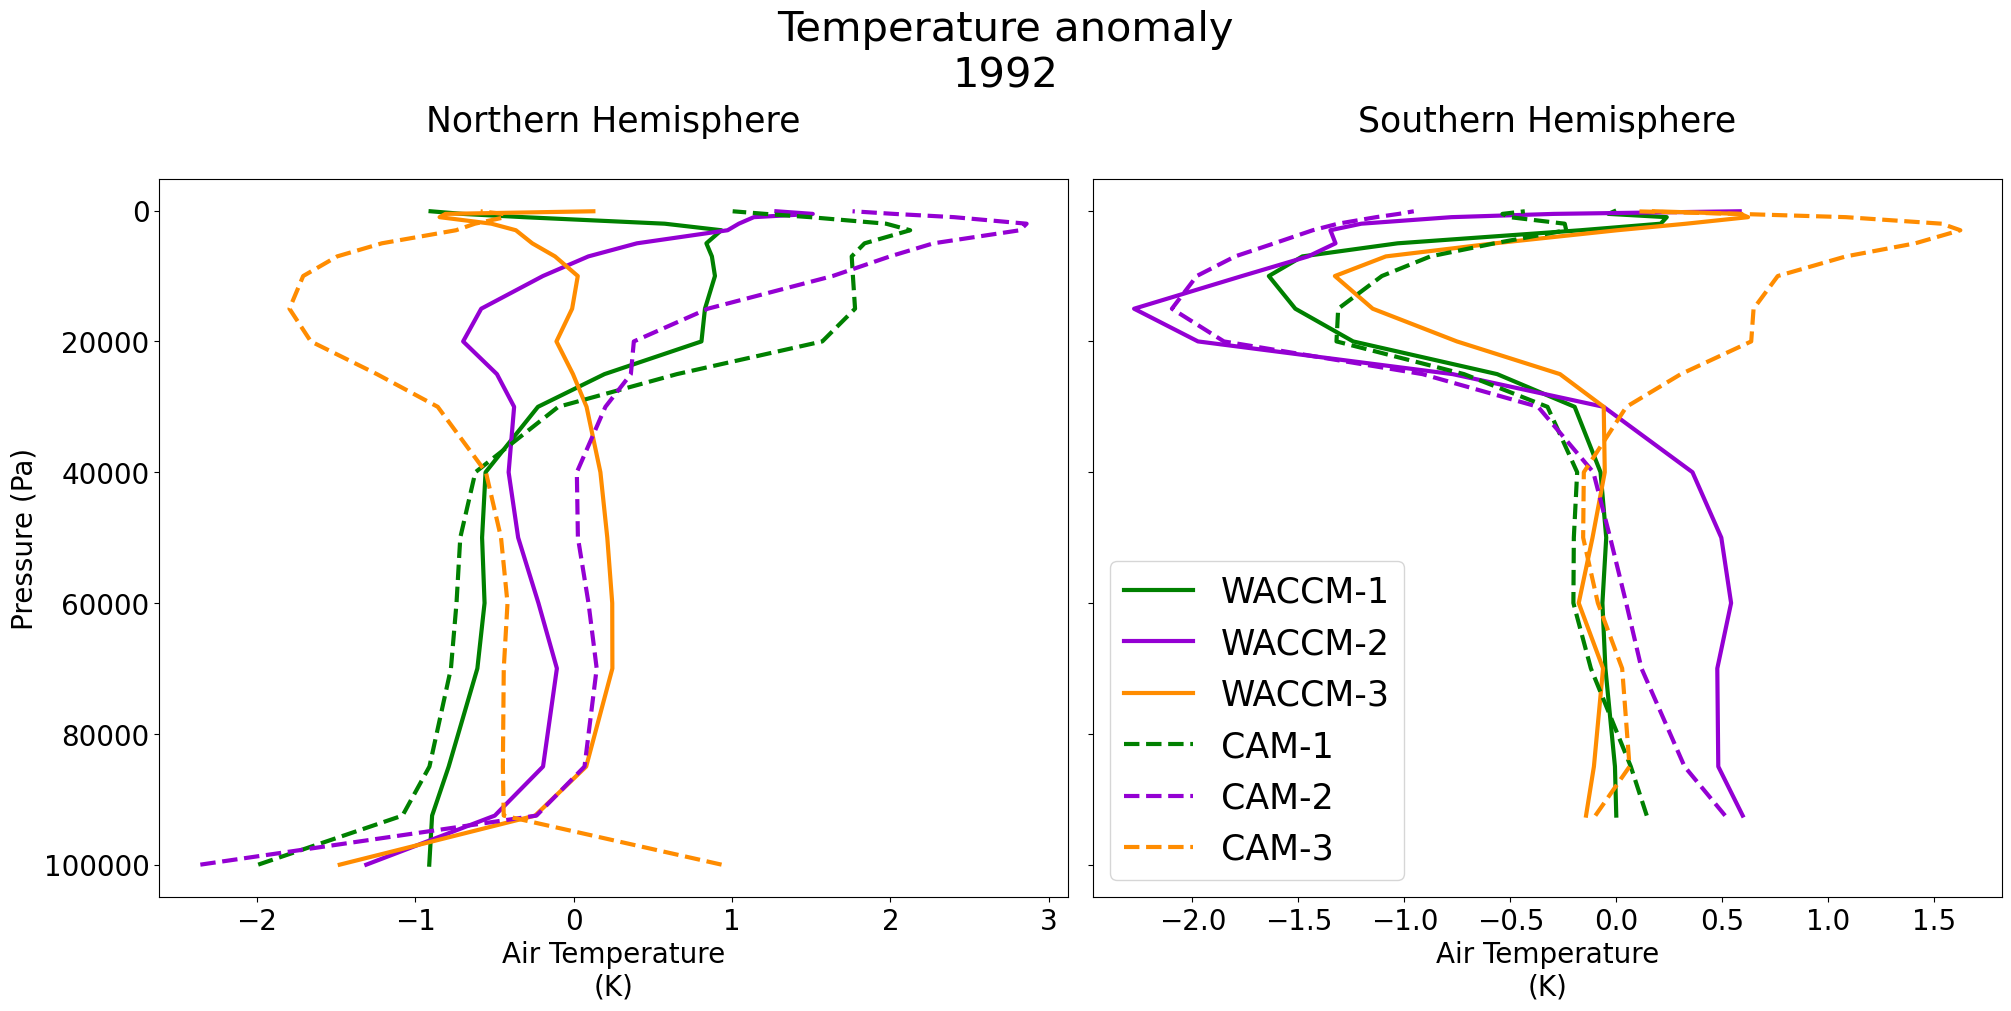

In [38]:
plot_temp(year_waccm_NH_anom_pina_temp.sel(year=1992),year_waccm_SH_anom_pina_temp.sel(year=1992),year_cam_NH_anom_pina_temp.sel(year=1992),year_cam_SH_anom_pina_temp.sel(year=1992),'Temperature anomaly\n1992')
